In [119]:
import pandas as pd
# import matplotlib.pyplot as plt
df = pd.read_csv("../data/base_prospect_clean.csv")
# print(df.sample(5))

<AxesSubplot: ylabel='Frequency'>

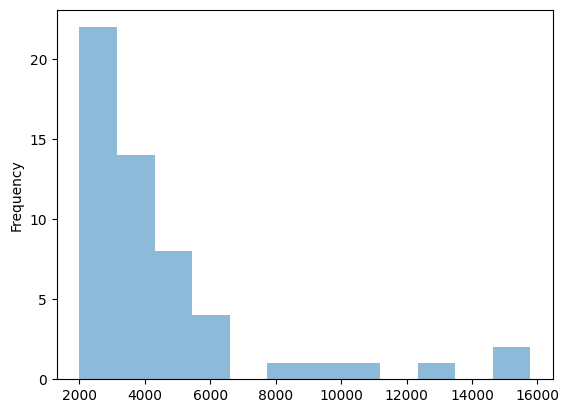

In [210]:
# histogram pour la fréquence
# plt.hist(df['ca_total_FL'], color="blue", edgecolor='black',linewidth=1.2, bins=10)

# diviser les valeurs en 3: < 1000, de 1000-7000 , <7000
data = df['effectif']
# part1 = df[(df.effectif < 200)]
# part2 = df[(df.effectif > 200) & (df.effectif < 1000)]
# part3 = df[(df.effectif > 1000) & (df.effectif < 2000)]
# part4 = df[(df.effectif > 2000) & (df.effectif < 20000)]

# ax = df[(df.effectif < 200)].effectif.plot.hist(bins=12,alpha=0.5)
# ax.savefig('../fig/hist_effectif_inf_200')
# df[(df.effectif > 200) & (df.effectif < 1000)].effectif.plot.hist(bins=12,alpha=0.5)
# df[(df.effectif > 1000) & (df.effectif < 2000)].effectif.plot.hist(bins=12,alpha=0.5)
# df[(df.effectif > 2000) & (df.effectif < 20000)].effectif.plot.hist(bins=12,alpha=0.5)

<AxesSubplot: ylabel='Frequency'>

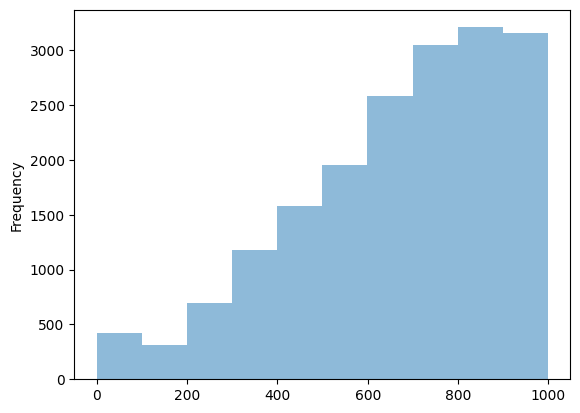

In [216]:
# ca_total_FL
df[df.ca_total_FL < 1000].ca_total_FL.plot.hist(alpha=0.5)

In [193]:
df[(df.effectif<26) & (df.effectif >0)].value_counts().sum()

65357

<AxesSubplot: ylabel='Frequency'>

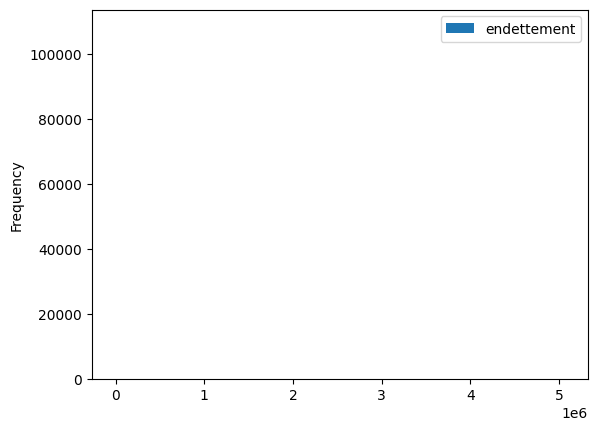

In [170]:
ax = df.plot.hist(column=["endettement"], bins=5000)
ax

<Figure size 640x480 with 0 Axes>

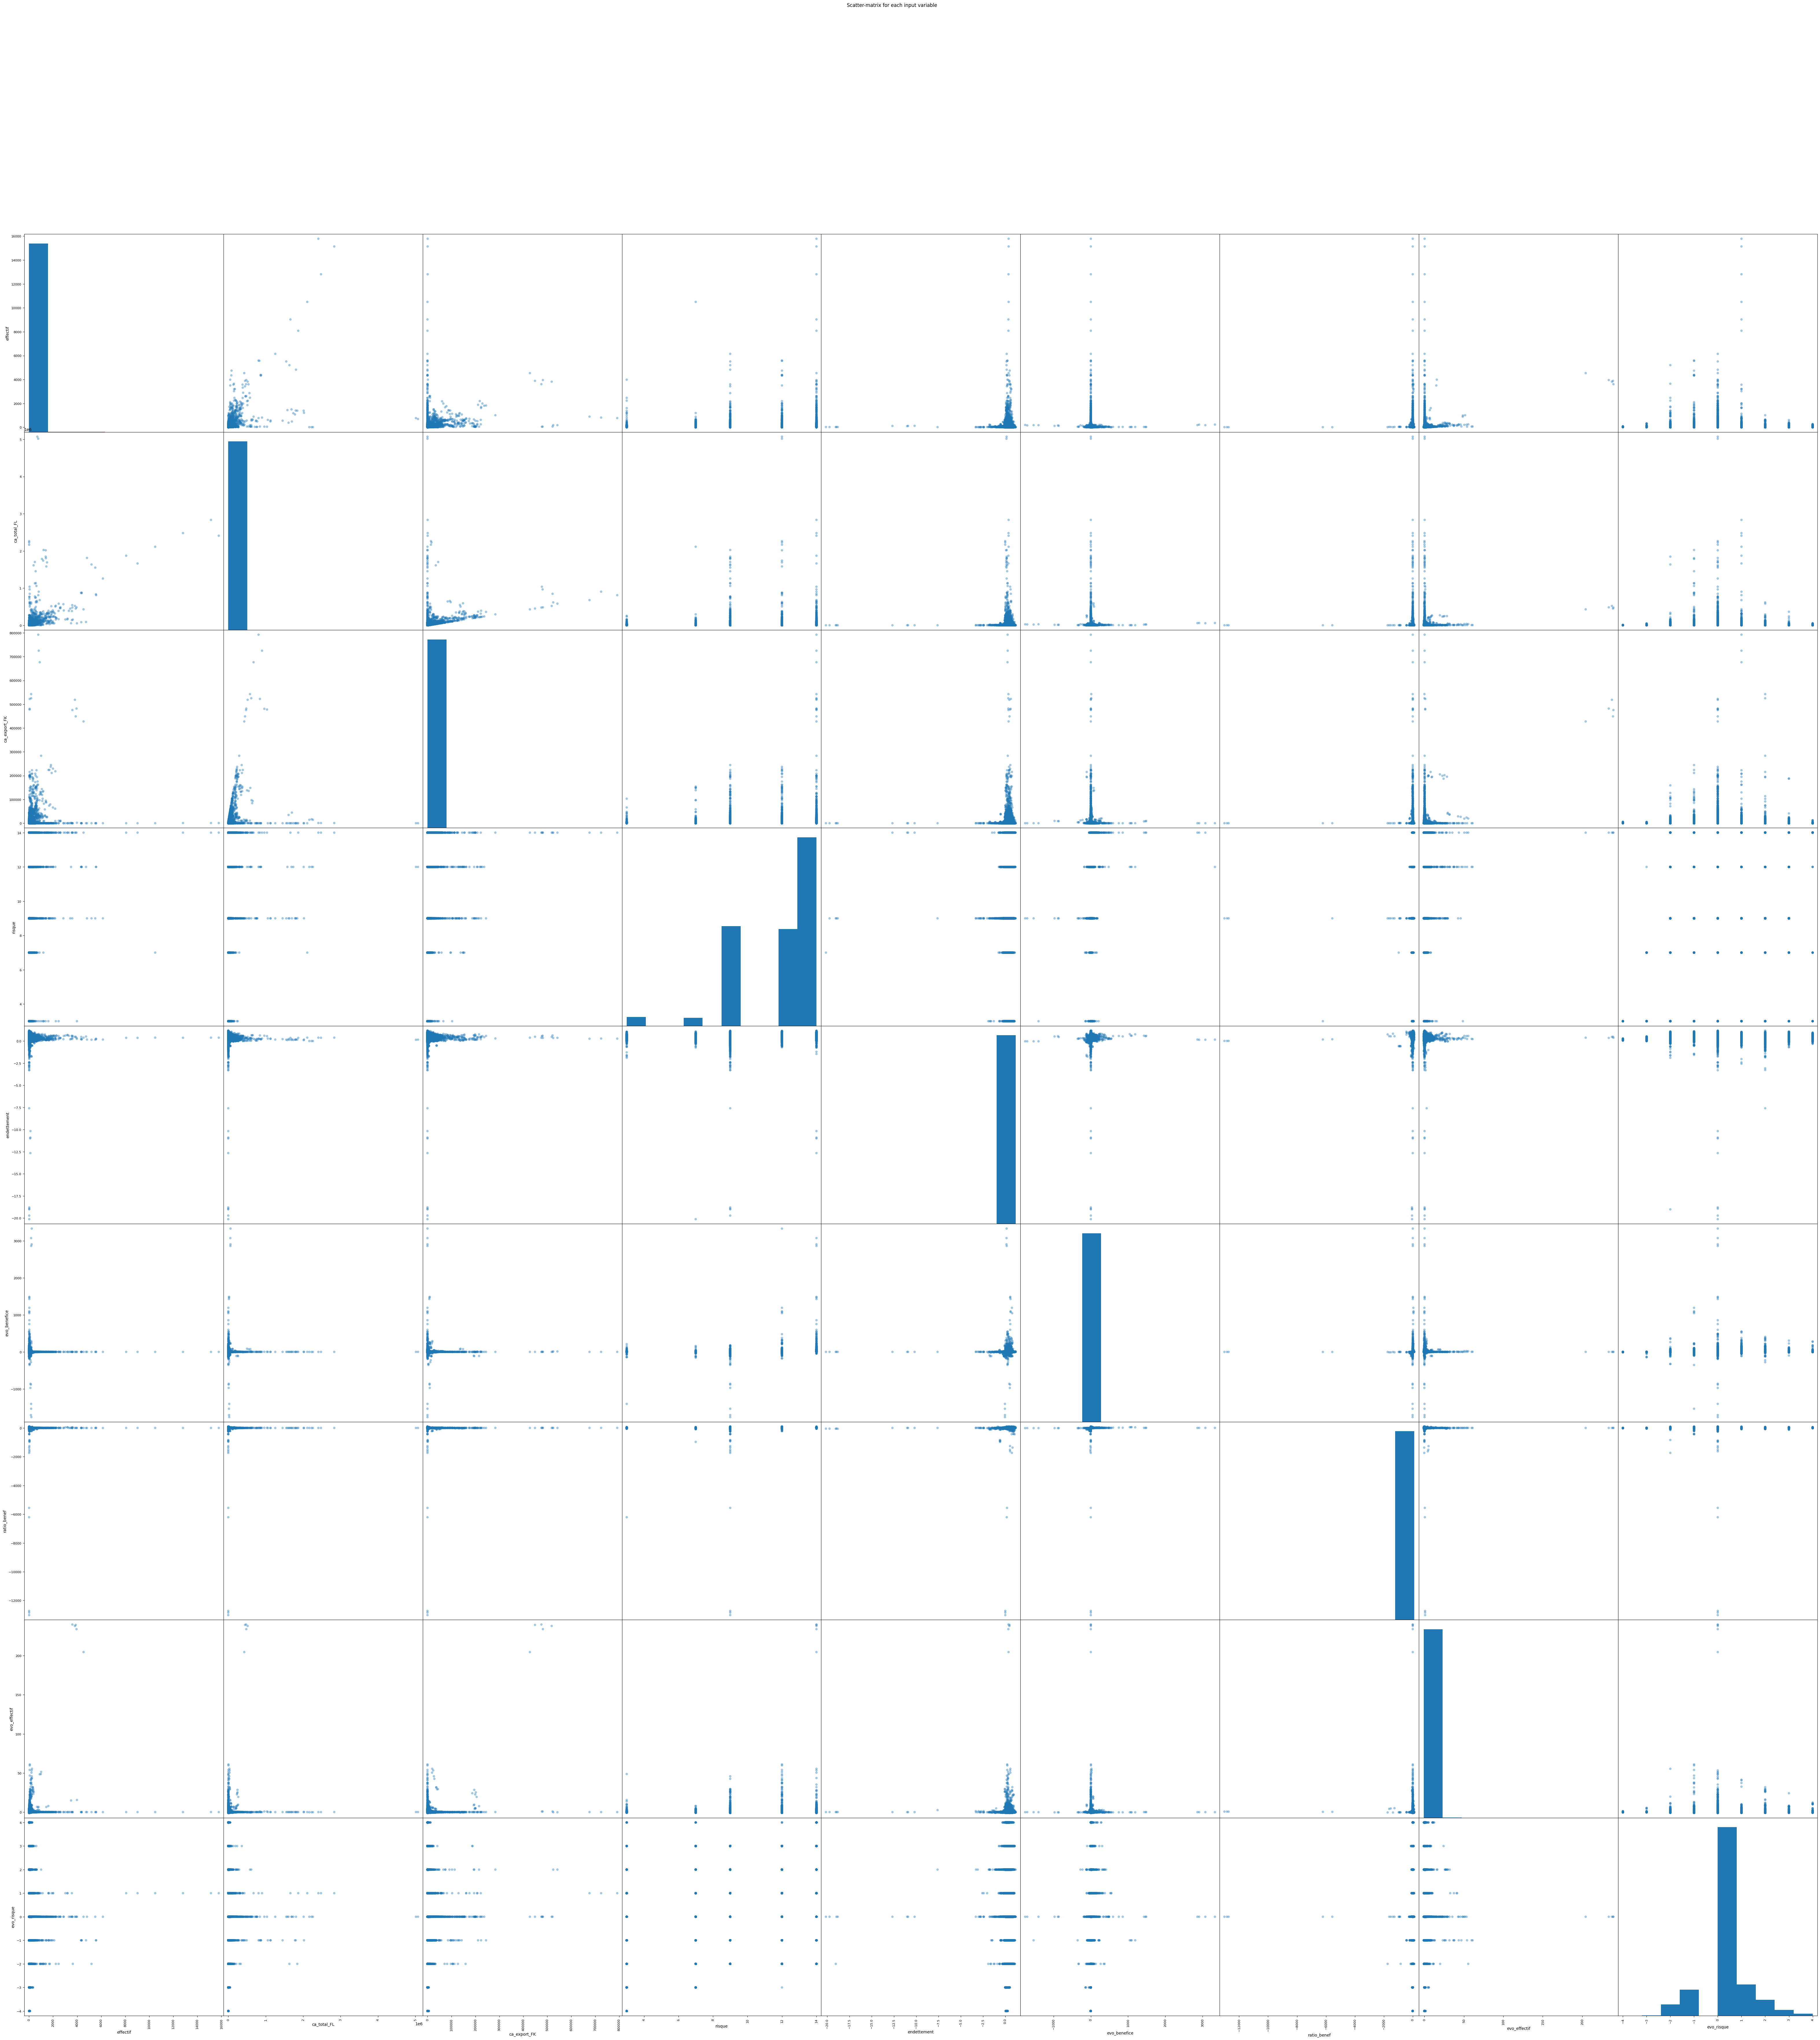

<Figure size 640x480 with 0 Axes>

In [79]:
# plot correlation between attributes w.r.t. classification
from matplotlib import cm

X = df.iloc[:,2:11]
# TODO
y = df.code_cr

fig = plt.figure()
cmap = cm.get_cmap('gnuplot')
# scatter = pd.plotting.scatter_matrix(X,, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
scatter = pd.plotting.scatter_matrix(X, alpha=0.4,marker='o',figsize=(80,80))
plt.suptitle('Scatter-matrix for each input variable')
plt.show()
plt.savefig('../fig/df_scatter_matrix')
plt.close(fig)


In [222]:
# Discretisation
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
X_norm = scaler.fit_transform(df.iloc[:,2:11])

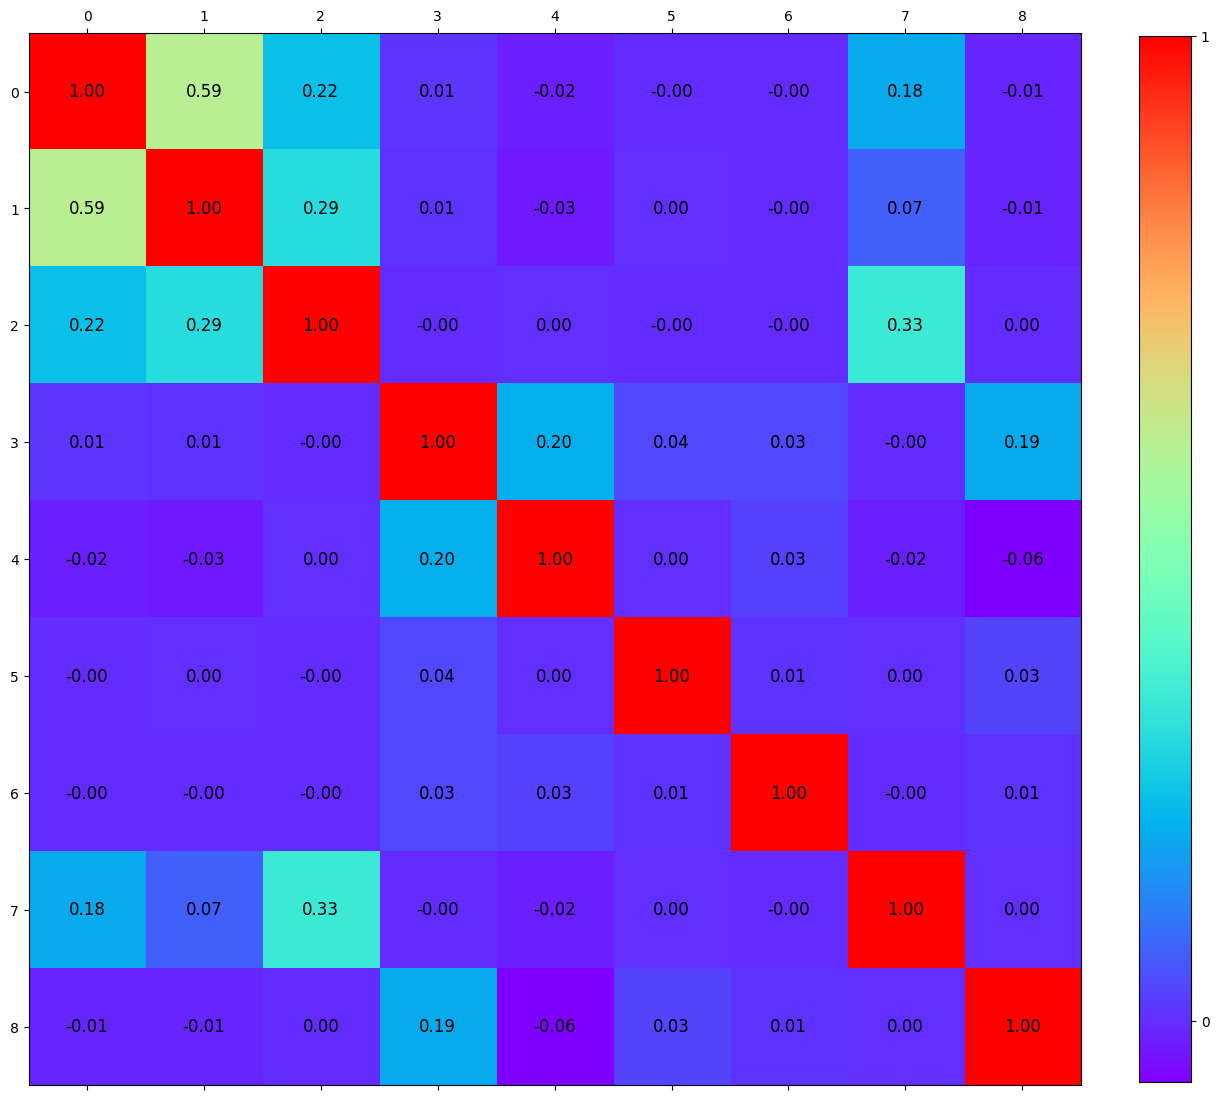

<Figure size 640x480 with 0 Axes>

In [227]:
# Plot the covariance matrix to identify the correlation between
# original features using a heatmap:
covar = np.corrcoef(X_norm.T)
fig = plt.figure(figsize=(15, 15))
plt.matshow(covar, cmap=plt.cm.rainbow,fignum=plt.gcf().number)
plt.colorbar(ticks = [-1, 0, 1], fraction=0.045)
for i in range(covar.shape[0]):
    for j in range(covar.shape[1]):
        plt.text(i, j, "%0.2f" % covar[i,j], size=12, color='black', ha="center", va="center")
plt.show()
plt.savefig('../fig/correlation_original_axes')
plt.close(fig)